#📌 Extracción

In [49]:
import pandas as pd

In [50]:
datos = pd.read_json('TelecomX_Data.json')
datos.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [51]:
print(datos.columns.tolist())


['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


In [52]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [53]:
with open('TelecomX_diccionario.md', 'r', encoding='utf-8') as archivo:
    contenido = archivo.read()
print(contenido)

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: t

In [54]:
datos['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869
,224


In [55]:
churn_col = datos['Churn']

nested_cols = ['customer', 'phone', 'internet', 'account']
for col in nested_cols:
    if col in datos.columns:
        datos = datos.join(datos[col].apply(pd.Series))
if 'Charges' in datos.columns:
    datos = datos.join(datos['Charges'].apply(pd.Series))

datos.drop(columns=nested_cols + ['Charges'], errors='ignore', inplace=True)
datos['Churn'] = churn_col

In [56]:
print(datos.columns)


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total'],
      dtype='object')


In [57]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


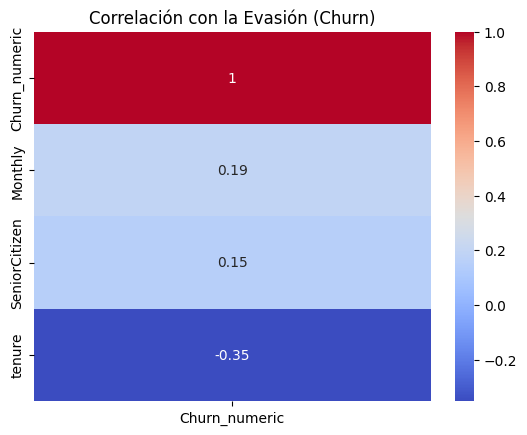


Tasa de evasión según tipo de servicio de Internet:


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

datos['Churn_numeric'] = datos['Churn'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else None))

correlacion = datos.corr(numeric_only=True)

sns.heatmap(correlacion[['Churn_numeric']].sort_values(by='Churn_numeric', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Correlación con la Evasión (Churn)')
plt.show()

print("\nTasa de evasión según tipo de servicio de Internet:")

if 'InternetService_Fiber optic' in datos.columns:
    print("Fiber optic:")
    print(datos.groupby('InternetService_Fiber optic')['Churn_numeric'].mean())

if 'InternetService_No' in datos.columns:
    print("\nSin Internet:")
    print(datos.groupby('InternetService_No')['Churn_numeric'].mean())



In [59]:
datos.isnull().sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [60]:
datos.duplicated().sum()

np.int64(0)

In [61]:
for col in datos.columns:
    print(f"{col}: {datos[col].nunique()} valores únicos")

customerID: 7267 valores únicos
Churn: 3 valores únicos
gender: 2 valores únicos
SeniorCitizen: 2 valores únicos
Partner: 2 valores únicos
Dependents: 2 valores únicos
tenure: 73 valores únicos
PhoneService: 2 valores únicos
MultipleLines: 3 valores únicos
InternetService: 3 valores únicos
OnlineSecurity: 3 valores únicos
OnlineBackup: 3 valores únicos
DeviceProtection: 3 valores únicos
TechSupport: 3 valores únicos
StreamingTV: 3 valores únicos
StreamingMovies: 3 valores únicos
Contract: 3 valores únicos
PaperlessBilling: 2 valores únicos
PaymentMethod: 4 valores únicos
Monthly: 1585 valores únicos
Total: 6531 valores únicos
Churn_numeric: 2 valores únicos


In [62]:
datos['Churn'] = datos['Churn'].str.strip()
datos['Churn'] = datos['Churn'].str.capitalize()




In [63]:
datos['Churn'] = datos['Churn'].str.strip().str.capitalize()
print(datos['Churn'].unique())



['No' 'Yes' '']


In [64]:
datos.dtypes


,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [65]:
datos.rename(columns={
    'Churn': 'Evasion',
    'tenure': 'AntiguedadMeses',
    'Monthly': 'CargoMensual',
    'Total': 'CargoTotal',
    'SeniorCitizen': 'EsAdultoMayor',
    'PaymentMethod': 'MetodoPago'
}, inplace=True)


In [66]:
datos = pd.get_dummies(datos, columns=['Contract', 'InternetService', 'MetodoPago'], drop_first=True)


# 📊**Carga y análisis(L - Load & Analysis)**

In [67]:
datos.select_dtypes(include='number').describe()


,EsAdultoMayor,AntiguedadMeses,CargoMensual,Churn_numeric
count,7267.000000,7267.000000,7267.000000,7043.000000
mean,0.162653,32.346498,64.720098,0.265370
std,0.369074,24.571773,30.129572,0.441561
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.425000,0.000000
50%,0.000000,29.000000,70.300000,0.000000
75%,0.000000,55.000000,89.875000,1.000000
max,1.000000,72.000000,118.750000,1.000000


In [68]:
datos.select_dtypes(include='number').median()


,0
EsAdultoMayor,0.0
AntiguedadMeses,29.0
CargoMensual,70.3
Churn_numeric,0.0


In [69]:
print("Evasión (Churn):")
print(datos['Evasion'].value_counts(normalize=True))

print("\nTipos de contrato:")
print(datos[['Contract_One year', 'Contract_Two year']].sum()) # Use the new column names

print("\nTipo de Internet:")
print(datos[['InternetService_Fiber optic', 'InternetService_No']].sum()) # Use the new column names

Evasión (Churn):
Evasion
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64

Tipos de contrato:
Contract_One year    1519
Contract_Two year    1743
dtype: int64

Tipo de Internet:
InternetService_Fiber optic    3198
InternetService_No             1581
dtype: int64


In [70]:
for col in datos.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(datos[col].value_counts(dropna=False))



customerID:
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Evasion:
Evasion
No     5174
Yes    1869
        224
Name: count, dtype: int64

gender:
gender
Male      3675
Female    3592
Name: count, dtype: int64

Partner:
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Dependents:
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

PhoneService:
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

MultipleLines:
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

OnlineSecurity:
OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64

OnlineBackup:
OnlineBackup
No                     3182
Yes                    2504
No internet service    1581
Nam

/tmp/ipython-input-1912864112.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Contract_One year', y='CargoMensual', data=datos, ax=axs[0, 1], palette='pastel')
/tmp/ipython-input-1912864112.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='InternetService_Fiber optic', y='CargoMensual', data=datos, ax=axs[1, 0], palette='muted')
/tmp/ipython-input-1912864112.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='InternetService_No', y='CargoMensual', data=datos, ax=axs[1, 1], palette='Set3')


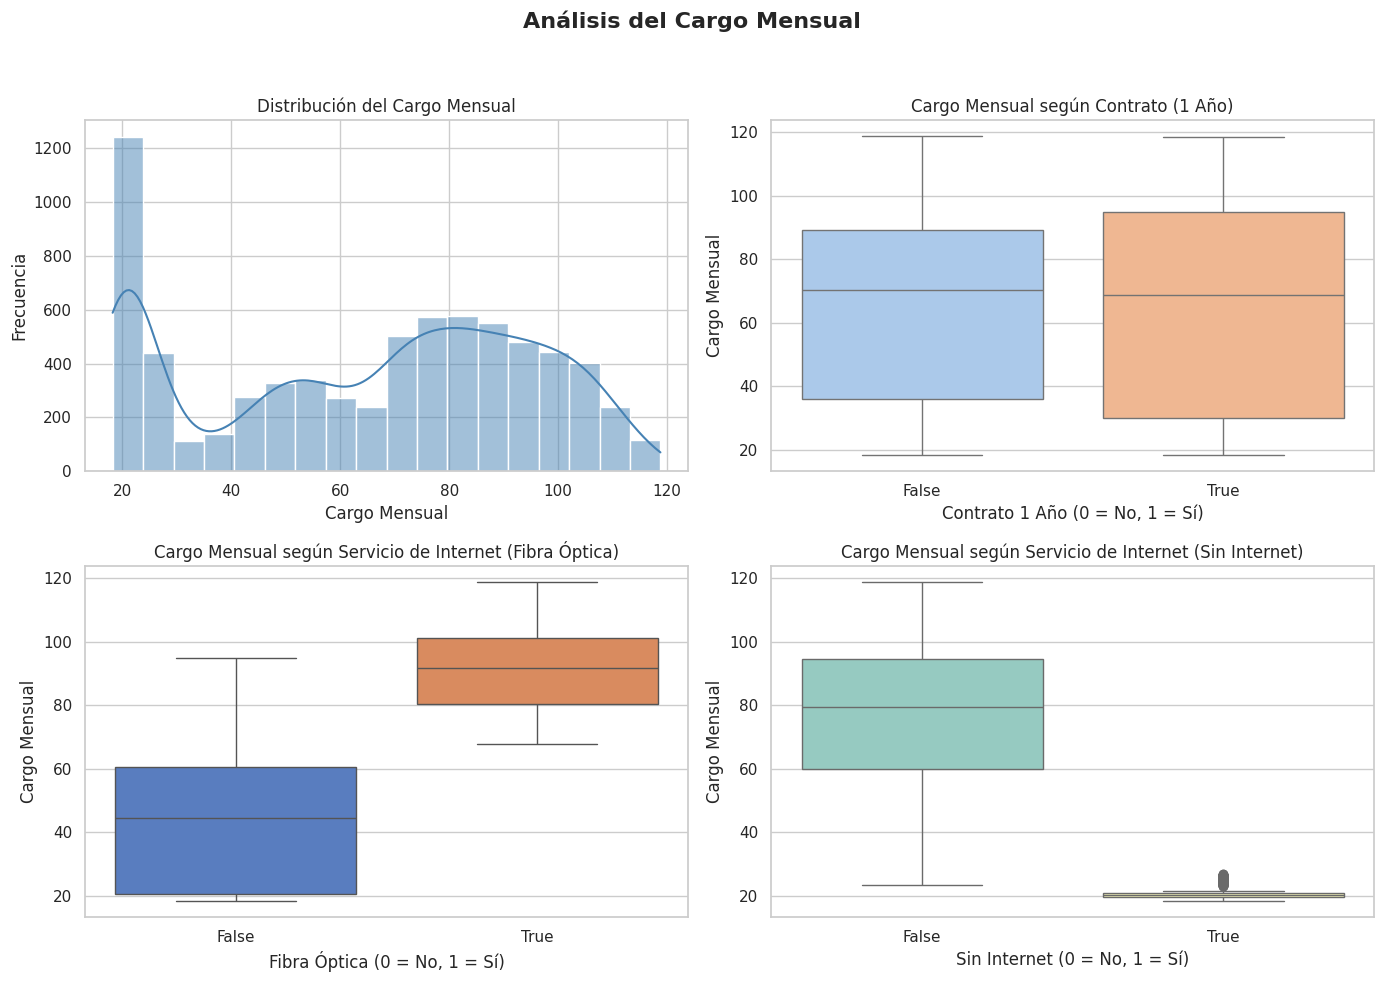

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', palette='Set2')

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Análisis del Cargo Mensual", fontsize=16, fontweight='bold')

sns.histplot(datos['CargoMensual'], kde=True, ax=axs[0, 0], color='steelblue')
axs[0, 0].set_title("Distribución del Cargo Mensual")
axs[0, 0].set_xlabel("Cargo Mensual")
axs[0, 0].set_ylabel("Frecuencia")

sns.boxplot(x='Contract_One year', y='CargoMensual', data=datos, ax=axs[0, 1], palette='pastel')
axs[0, 1].set_title("Cargo Mensual según Contrato (1 Año)")
axs[0, 1].set_xlabel("Contrato 1 Año (0 = No, 1 = Sí)")
axs[0, 1].set_ylabel("Cargo Mensual")

sns.boxplot(x='InternetService_Fiber optic', y='CargoMensual', data=datos, ax=axs[1, 0], palette='muted')
axs[1, 0].set_title("Cargo Mensual según Servicio de Internet (Fibra Óptica)")
axs[1, 0].set_xlabel("Fibra Óptica (0 = No, 1 = Sí)")
axs[1, 0].set_ylabel("Cargo Mensual")

sns.boxplot(x='InternetService_No', y='CargoMensual', data=datos, ax=axs[1, 1], palette='Set3')
axs[1, 1].set_title("Cargo Mensual según Servicio de Internet (Sin Internet)")
axs[1, 1].set_xlabel("Sin Internet (0 = No, 1 = Sí)")
axs[1, 1].set_ylabel("Cargo Mensual")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



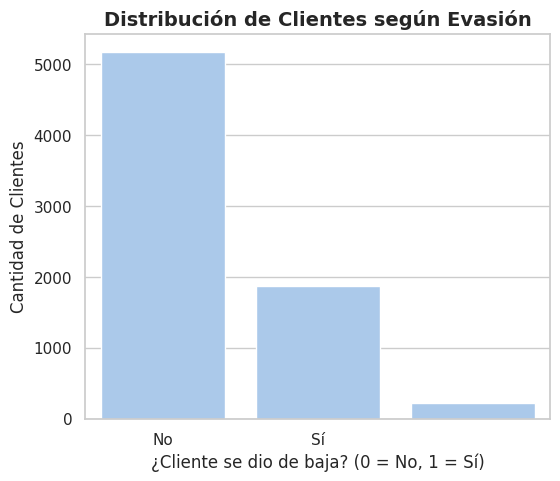

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(6, 5))
sns.countplot(x='Evasion', data=datos)
plt.title("Distribución de Clientes según Evasión", fontsize=14, fontweight='bold')
plt.xlabel("¿Cliente se dio de baja? (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de Clientes")
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()



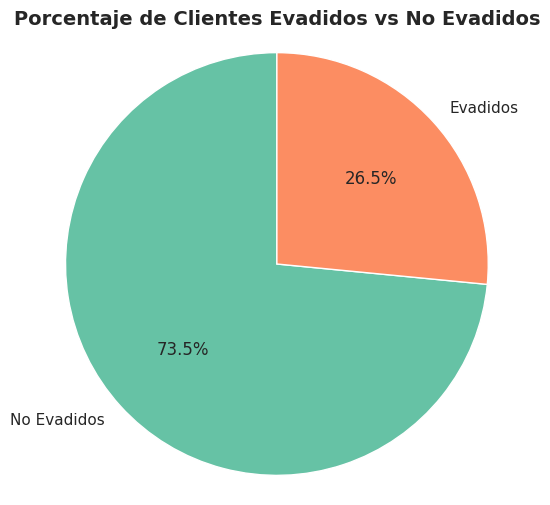

In [81]:
import matplotlib.pyplot as plt

def grafico_evasion_pastel(datos):
    conteo = datos[datos['Evasion'] != '']['Evasion'].value_counts()
    etiquetas = ['No Evadidos', 'Evadidos']

    plt.figure(figsize=(6, 6))
    plt.pie(conteo, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
    plt.title("Porcentaje de Clientes Evadidos vs No Evadidos", fontsize=14, fontweight='bold')
    plt.axis('equal')
    plt.show()
grafico_evasion_pastel(datos)


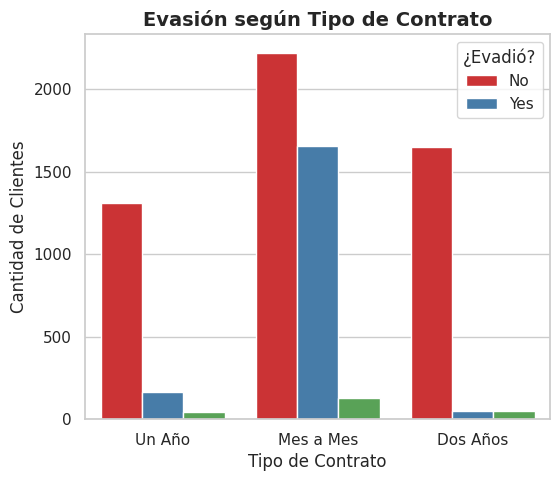

In [94]:
def graficar_evasion_por_contrato(datos):
    def tipo_contrato(row):
        if row['Contract_One year'] == 1:
            return 'Un Año'
        elif row['Contract_Two year'] == 1:
            return 'Dos Años'
        else:
            return 'Mes a Mes'

    datos['Contrato'] = datos.apply(tipo_contrato, axis=1)

    plt.figure(figsize=(6, 5))
    sns.countplot(data=datos, x='Contrato', hue='Evasion', palette='Set1')
    plt.title("Evasión según Tipo de Contrato", fontsize=14, fontweight='bold')
    plt.xlabel("Tipo de Contrato")
    plt.ylabel("Cantidad de Clientes")
    plt.legend(title="¿Evadió?")
    plt.show()

graficar_evasion_por_contrato(datos)



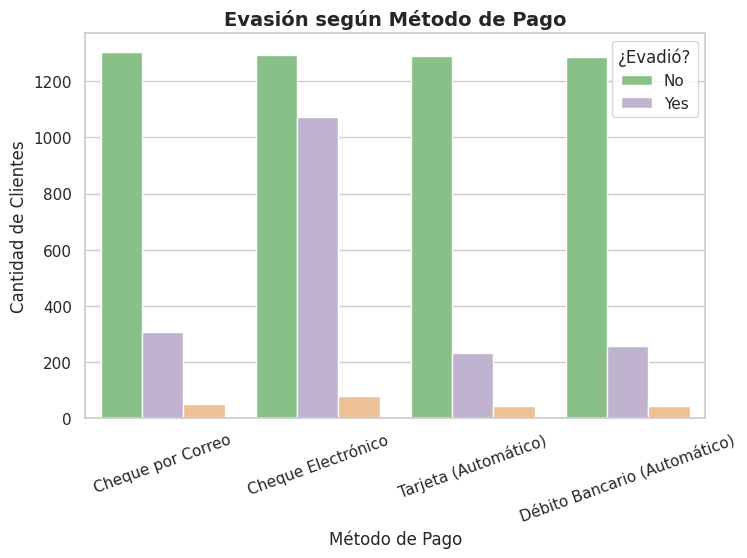

In [97]:
def graficar_evasion_por_metodo_pago(datos):
    def metodo_pago(row):
        if row['MetodoPago_Credit card (automatic)'] == 1:
            return 'Tarjeta (Automático)'
        elif row['MetodoPago_Electronic check'] == 1:
            return 'Cheque Electrónico'
        elif row['MetodoPago_Mailed check'] == 1:
            return 'Cheque por Correo'
        else:
            return 'Débito Bancario (Automático)'

    datos['MetodoPago'] = datos.apply(metodo_pago, axis=1)

    plt.figure(figsize=(8, 5))
    sns.countplot(data=datos, x='MetodoPago', hue='Evasion', palette='Accent')
    plt.title("Evasión según Método de Pago", fontsize=14, fontweight='bold')
    plt.xlabel("Método de Pago")
    plt.ylabel("Cantidad de Clientes")
    plt.legend(title="¿Evadió?")
    plt.xticks(rotation=20)
    plt.show()

graficar_evasion_por_metodo_pago(datos)



/tmp/ipython-input-2087872345.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="¿Evadió?")


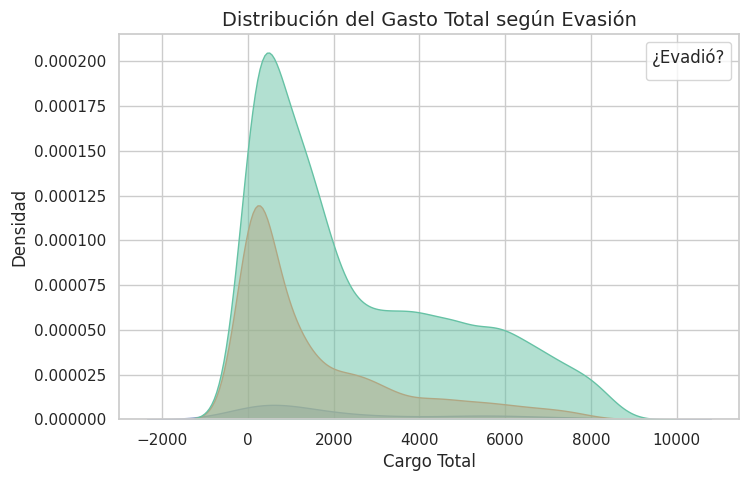

In [99]:
def graficar_distribucion_cargo_total(datos):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Asegurar que 'CargoTotal' sea numérico
    datos['CargoTotal'] = pd.to_numeric(datos['CargoTotal'], errors='coerce')

    # Eliminar filas con valores nulos en 'CargoTotal'
    datos_grafico = datos.dropna(subset=['CargoTotal'])

    # Graficar la distribución con KDE
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=datos_grafico, x='CargoTotal', hue='Evasion', fill=True,
                palette='Set2', alpha=0.5)
    plt.title("Distribución del Gasto Total según Evasión", fontsize=14)
    plt.xlabel("Cargo Total")
    plt.ylabel("Densidad")
    plt.legend(title="¿Evadió?")
    plt.show()

graficar_distribucion_cargo_total(datos)

/tmp/ipython-input-1724704662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos, x='Evasion', y='AntiguedadMeses', palette='coolwarm')


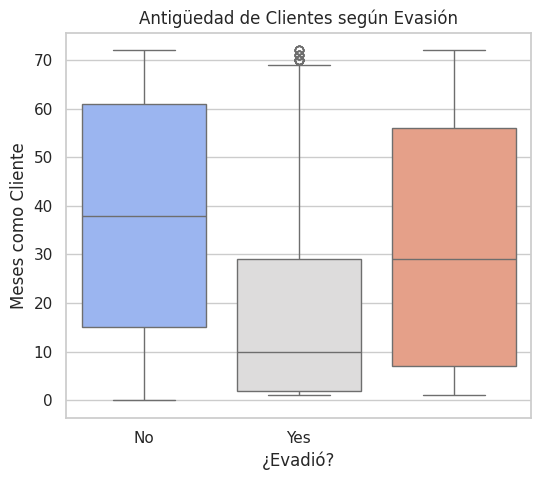

In [77]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=datos, x='Evasion', y='AntiguedadMeses', palette='coolwarm')
plt.title("Antigüedad de Clientes según Evasión")
plt.xlabel("¿Evadió?")
plt.ylabel("Meses como Cliente")
plt.show()

/tmp/ipython-input-277886977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos, x='Evasion', y='CargoMensual', palette='Set3')


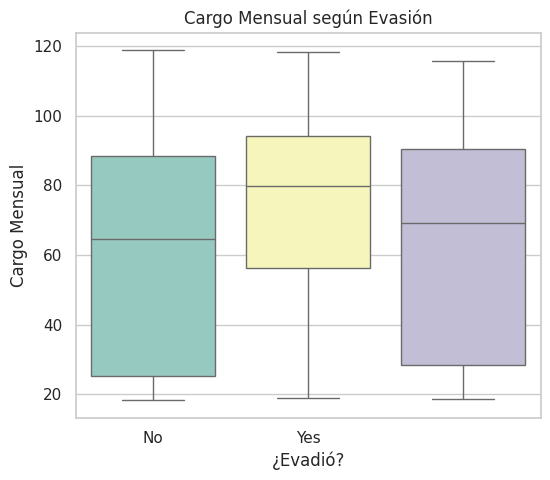

In [78]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=datos, x='Evasion', y='CargoMensual', palette='Set3')
plt.title("Cargo Mensual según Evasión")
plt.xlabel("¿Evadió?")
plt.ylabel("Cargo Mensual")
plt.show()

#📄Informe final

# **Introducción**




La evasión de clientes representa un desafío clave para empresas del sector de telecomunicaciones, ya que afecta directamente la rentabilidad y sostenibilidad del negocio. Comprender los factores que influyen en la cancelación del servicio permite identificar oportunidades de intervención y diseñar estrategias de fidelización más efectivas.

Este análisis se basa en un conjunto de datos que contiene información demográfica, características del servicio contratado, detalles de facturación y registros de cancelación, con el fin de identificar los patrones asociados con la evasión de clientes.

# **Limpieza y Tratamiento de datos**

Durante la etapa inicial del proyecto se realizaron los siguientes pasos para garantizar la calidad y consistencia del análisis:

Revisión estructural del conjunto de datos: Se verificó la integridad del archivo, las dimensiones de la tabla, y el tipo de variables presentes.

Manejo de valores nulos: Se identificaron valores ausentes en algunas columnas como gender. Estos fueron tratados de forma apropiada según su impacto en el análisis.

Conversión de variables: La variable objetivo Churn fue transformada a formato binario (Yes → 1, No → 0), generando una nueva columna Churn_numeric que permite aplicar métricas estadísticas y visualizaciones numéricas.

Codificación de variables categóricas: Columnas como Contract, InternetService y PaymentMethod fueron transformadas utilizando variables dummy, facilitando su análisis en modelos posteriores y en correlaciones.

# **Análisis Exploratorio de Datos**

Evasión General
El análisis inicial de la variable Churn revela que aproximadamente:

26.5% de los clientes han cancelado el servicio.

73.5% continúan activos.

Esta proporción indica una tasa de evasión considerable que podría ser abordada estratégicamente.


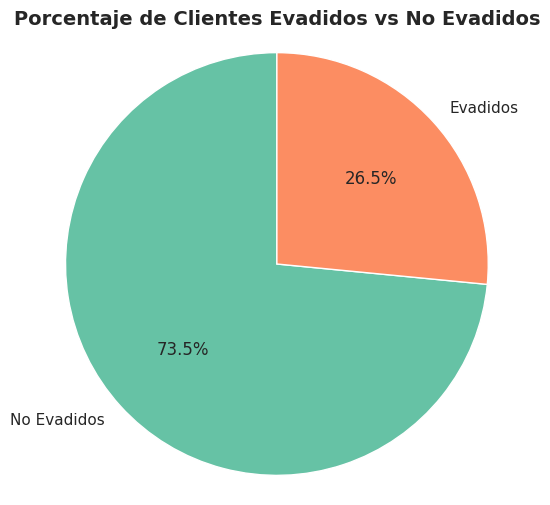

In [82]:
grafico_evasion_pastel(datos)

# **Análisis de Variables Categóricas**

**Tipo de Contrato**:
Los clientes con contrato mes a mes presentan una tasa de cancelación significativamente mayor en comparación con quienes tienen contratos anuales o bianuales. Esto sugiere que el grado de compromiso influye directamente en la retención del cliente.



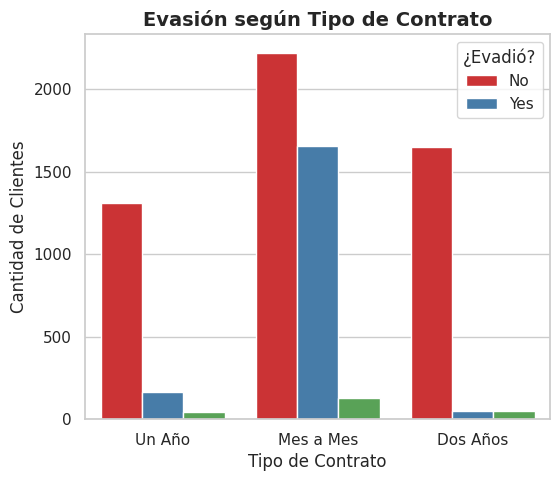

In [95]:
graficar_evasion_por_contrato(datos)

**Método de Pago**:
Las tasas de evasión más altas se observan en clientes que utilizan cheque electrónico o cheque por correo, mientras que los métodos automáticos como tarjeta de crédito o débito bancario están asociados con menores tasas de cancelación.




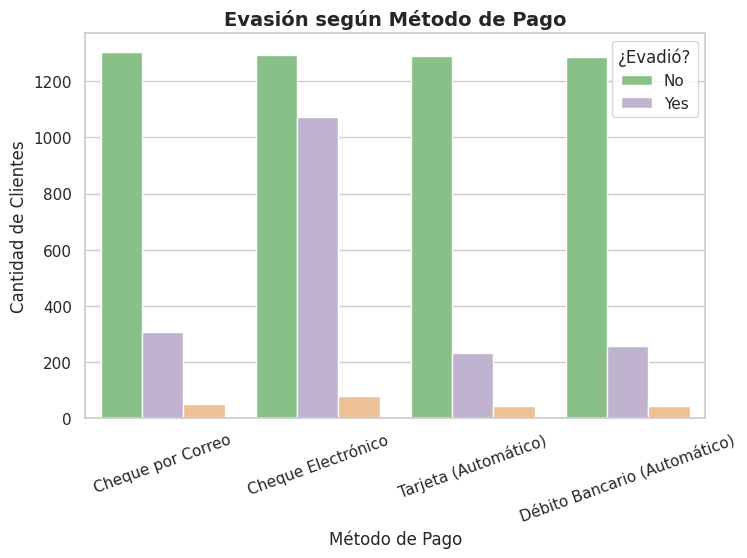

In [98]:
graficar_evasion_por_metodo_pago(datos)

Otros factores categóricos como Partner, Dependents y PaperlessBilling también muestran diferencias relevantes al ser comparados con la variable Churn_numeric.


# **Análisis de Variables Numéricas**

**Antigüedad del Cliente**:
Existe una relación inversa entre el tiempo que un cliente permanece en la empresa y la probabilidad de cancelar. La mayoría de las cancelaciones se concentran en clientes con menor antigüedad.

**Cargo Mensual**:
Los clientes con cargos mensuales más elevados presentan tasas de evasión superiores. Esto podría estar asociado a una percepción de bajo valor por el costo pagado.

**Cargo Total**:
Se observa que muchos de los clientes que se evadieron acumularon un gasto total bajo, lo que refuerza la hipótesis de cancelación temprana.

/tmp/ipython-input-2087872345.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="¿Evadió?")


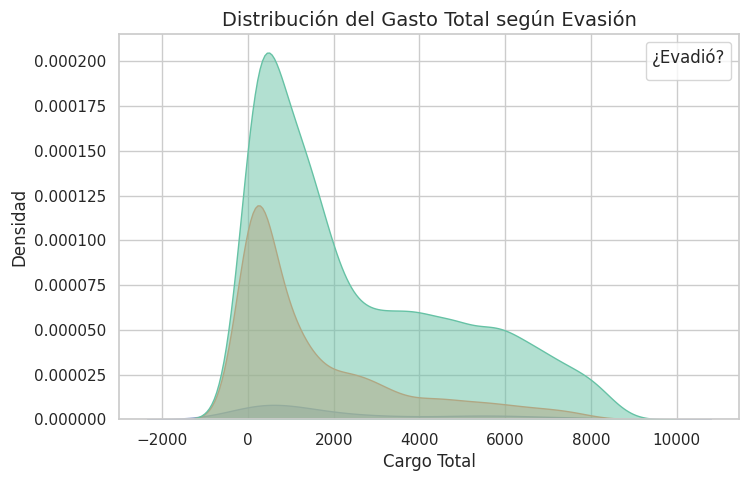

In [100]:
graficar_distribucion_cargo_total(datos)


# **Conclusiones e Insights**

El análisis sugiere que existen patrones consistentes entre ciertas variables y la propensión de los clientes a cancelar el servicio. En primer lugar, el tipo de contrato muestra una relación clara: los contratos a corto plazo, como los de tipo "mes a mes", están directamente asociados con tasas de evasión más altas, mientras que los contratos más largos tienden a retener mejor a los clientes. En cuanto al método de pago, se observa que aquellos clientes que utilizan métodos manuales, como cheques enviados por correo o electrónicos, presentan una mayor probabilidad de cancelar el servicio, en contraste con quienes emplean métodos automáticos como el débito bancario o tarjeta de crédito, que muestran una mayor fidelidad. Por otro lado, la antigüedad del cliente también es un factor determinante: los primeros meses son críticos, ya que los clientes nuevos presentan una mayor tendencia a cancelar el servicio. Finalmente, en lo que respecta a la percepción del costo, se identifica que los clientes que pagan montos más altos mensualmente son más propensos a cancelar, lo que podría estar relacionado con expectativas no cumplidas respecto a la calidad del servicio recibido.

# **Recomendaciones**


 **Promover contratos de largo plazo**:
Ofrecer incentivos (descuentos, beneficios exclusivos) para fomentar contratos anuales o bianuales.

**Fomentar métodos de pago automáticos**:
Establecer campañas que impulsen el uso de tarjeta de crédito o débito automático, ofreciendo beneficios adicionales por su adopción.

**Fortalecer el proceso de onboarding**:
Enfocar esfuerzos en la etapa inicial del ciclo de vida del cliente con seguimiento personalizado, asesoría y comunicación activa.

**Revisión de estructura tarifaria**:
Evaluar si los planes de mayor costo están alineados con el valor percibido. Considerar ajustes o inclusión de beneficios adicionales.

